In [2]:
#importing necessary libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression as Reg
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#importing the data:

df = pd.read_csv('C:/Users/USER/Desktop/Projects/Datasets/fishmarket/Fish.csv')

In [4]:
#reading the data:

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
#understanding the number of datapoints:

df.shape

(159, 7)

In [6]:
#checking datatype:

df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [7]:
#Checking for missing values:

df[df.isnull().any(axis=1)].head()

,Species,Weight,Length1,Length2,Length3,Height,Width


# Preprocessing the data:

In [8]:
#Renaming the columns:

df.columns=['Species', 'Weight', 'Vertical Length', 'Diagonal Length', 'Cross Length', 'Height', 'Width']
df.head()

,Species,Weight,Vertical Length,Diagonal Length,Cross Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
#Checking the correlation among the data:

df.corr()

,Weight,Vertical Length,Diagonal Length,Cross Length,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Vertical Length,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Diagonal Length,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Cross Length,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [10]:
#Basic statistics of the data:

df.describe()

,Weight,Vertical Length,Diagonal Length,Cross Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Checking for outliers:

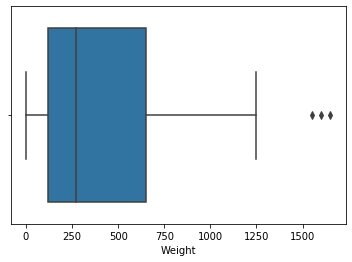

In [12]:
#Box plot for Weight:

sns.boxplot(x=df['Weight'])

In [13]:
#Treating for outliers:

dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

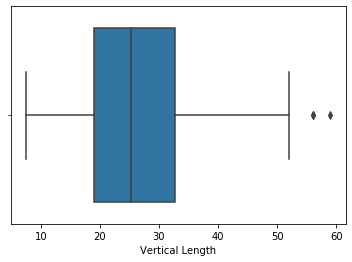

In [14]:
#Box plot for Vertical Length:

sns.boxplot(x=df['Vertical Length'])

In [15]:
#Treating for outliers:

dfvl = df['Vertical Length']
dfvl_Q1 = dfvl.quantile(0.25)
dfvl_Q3 = dfvl.quantile(0.75)
dfvl_IQR = dfvl_Q3 - dfvl_Q1
dfvl_lowerend = dfvl_Q1 - (1.5 * dfvl_IQR)
dfvl_upperend = dfvl_Q3 + (1.5 * dfvl_IQR)

dfvl_outliers = dfvl[(dfvl < dfvl_lowerend) | (dfvl > dfvl_upperend)]
dfvl_outliers

142    56.0
143    56.0
144    59.0
Name: Vertical Length, dtype: float64

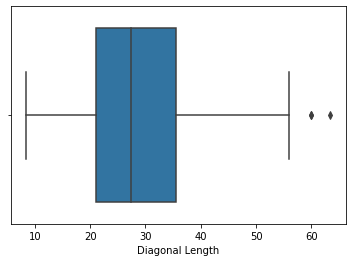

In [16]:
#Box plot for Vertical Length:

sns.boxplot(x=df['Diagonal Length'])

In [17]:
#Treating for outliers:

dfdl = df['Diagonal Length']
dfdl_Q1 = dfdl.quantile(0.25)
dfdl_Q3 = dfdl.quantile(0.75)
dfdl_IQR = dfdl_Q3 - dfdl_Q1
dfdl_lowerend = dfdl_Q1 - (1.5 * dfdl_IQR)
dfdl_upperend = dfdl_Q3 + (1.5 * dfdl_IQR)

dfdl_outliers = dfdl[(dfdl < dfdl_lowerend) | (dfdl > dfdl_upperend)]
dfdl_outliers

142    60.0
143    60.0
144    63.4
Name: Diagonal Length, dtype: float64

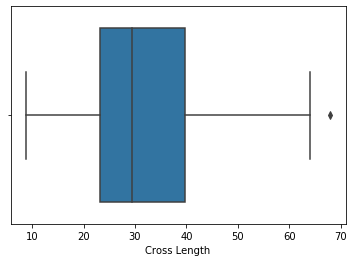

In [18]:
#Box plot for Vertical Length:

sns.boxplot(x=df['Cross Length'])

In [19]:
#Treating for outliers:

dfcl = df['Cross Length']
dfcl_Q1 = dfcl.quantile(0.25)
dfcl_Q3 = dfcl.quantile(0.75)
dfcl_IQR = dfcl_Q3 - dfcl_Q1
dfcl_lowerend = dfcl_Q1 - (1.5 * dfcl_IQR)
dfcl_upperend = dfcl_Q3 + (1.5 * dfcl_IQR)

dfcl_outliers = dfcl[(dfcl < dfcl_lowerend) | (dfcl > dfcl_upperend)]
dfcl_outliers

144    68.0
Name: Cross Length, dtype: float64

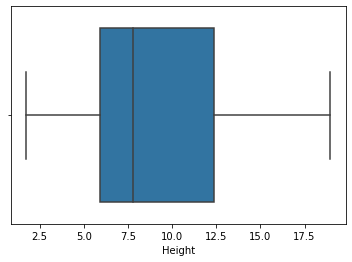

In [20]:
#Box plot for Height:

sns.boxplot(x=df['Height'])

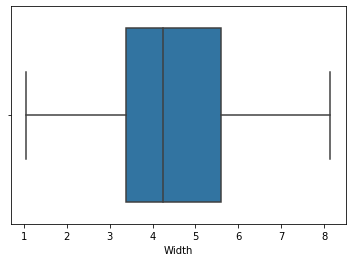

In [21]:
#Box plot for Width:

sns.boxplot(x=df['Width'])

Thus, our outliers in the dataset are observation no. 142, 143 and 144 which we will drop.

In [22]:
#Removing outliers:

df1 = df.drop([142,143,144])
df1.describe()

,Weight,Vertical Length,Diagonal Length,Cross Length,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


# Visualising the data:

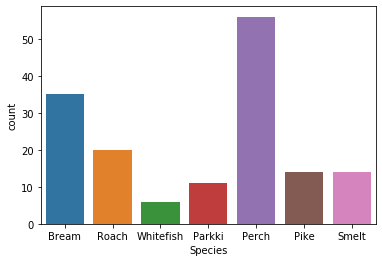

In [23]:
#Checking the number of fishes for each species:

sns.countplot(x = 'Species', data=df1)

Clearly, Perch is the dominant species among the dataset, with Whitefish being the least.

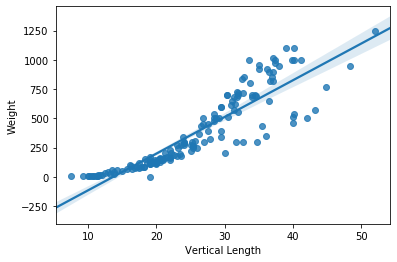

In [35]:
#Visualising the relationship:

sns.regplot(x="Vertical Length", y="Weight", data=df1)

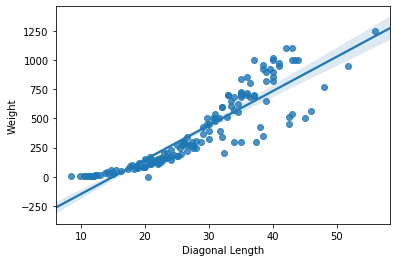

In [36]:
#Visualising the relationship:

sns.regplot(x="Diagonal Length", y="Weight", data=df1)

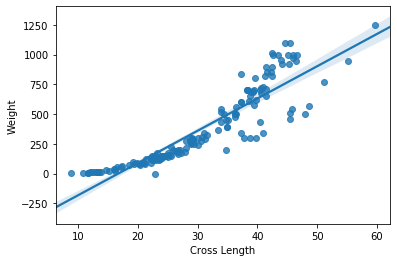

In [37]:
#Visualising the relationship:

sns.regplot(x="Cross Length", y="Weight", data=df1)

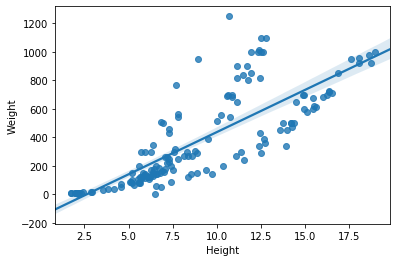

In [38]:
#Visualising the relationship:

sns.regplot(x="Height", y="Weight", data=df1)

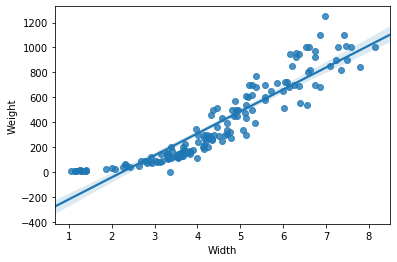

In [40]:
#Visualising the relationship:

sns.regplot(x="Width", y="Weight", data=df1)

# Fitting the Linear Regression Model:

In [24]:
#Separating the regressors and the regressands:

y = df1['Weight']
X = df1.iloc[:, 2:7]

In [25]:
#Train-Test split:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))


How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [26]:
#Fitting the model:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#Model:

print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')


y = -432.42 + 98.81*X1 -45.15*X2 -33.80*X3 + 33.64*X4 + 59.73*X5


## Checking for model accuracy:



In [28]:
#Accuracy of train dataset:

y_hat = reg.predict(X_train)

r2_score(y_train, y_hat)

0.9003754561488239

In [29]:
#Accuracy of test dataset:

y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.9168025741580008

## Comparing real and predicted values:

In [30]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])

y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)


ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew


,Weight,Estimated Weight
0,720.0,691.161325
1,390.0,507.153116
2,78.0,92.422013
3,685.0,736.970498
4,700.0,650.656479
5,390.0,463.606469
6,160.0,186.964868
7,300.0,444.424014
8,500.0,590.011387
9,0.0,166.777045
